# Proteína CDK2
## Resultados del ejercicio de  *redocking*  con complejos cocristalizados

Esta libreta tiene como objetivo analizar los resultados del acomplamiento molecular realizado con los complejos cocristalizados **Proteína-ligando** de la proteína CDK2.  
Dichos resultados fueron genrados de la siguiente manera:
1. Se identificaron todas las estructuras cristalográficas de la proteína que tuviesen alguna molécula ligando en su sitio activo.
2. Se realizó el acoplamiento molecular entre cada par *proteína-ligando*, es decir, la molécula que ya venía en el sitio activo, fue "reacoplada" usando diferentes programas de acoplamiento molecular.
> **El objetivo principal** fue comparar las **_poses_** generadas tras el *docking* con las poses originales (experimentales o cristalográficas), para así **evaluar el desempeño de los programas de acoplamiento molecular** al momento de **predecir la _pose_ de acoplamiento**.
3. Los programas de acoplamiento molecular utilizados fueron:
    - Autodock 4.
    - Autodock Vina.
    - Smina, con *scoring* Vinardo.
4. Se calculó el RMSD entre la pose original y la pose predicha por cada programa.
5. Los valores de RMSD para cada uno de los complejos es presentada y evaluada a continuación.

#### Cargamos las librerías necesarias para comenzar el análisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os, sys
# Añadimos la ruta del directorio raíz para tener acceso a los archivos y módulos
sys.path.append(r'..')

In [2]:
# Nombre de la proteina de interés
prot_name = 'cdk2'

## Resultados de RMSD
- Los resultados que aquí se presentan corresponden a los programas de docking usando los siguientes parámetros:

    1. **AD4\_DEF\_LE** y **AD4\_DEF\_LC**: 
        - **Autodock4.2:** 0.25 millones de evaluaciones y 20 corridas (parámetros default).
            - **_LE: Lowest Energy_**: Pose elegida según la menor energía de todas las predichas.
            - **_LC: Largest Cluster_**: Pose elegida según la menor energía de las poses del *cluster* de poses. más poblado.
    2. **AD4\_2.5M\_LE** y **AD4\_2.5M\_LC**: 
        - **Autodock4.2:** 2.5 millones de evaluaciones y 50 corridas).
            - **_LE: Lowest Energy_**: Pose elegida según la menor energía de todas las predichas.
            - **_LC: Largest Cluster_**: Pose elegida según la menor energía de las poses del *cluster* de poses.
    3. **AD4\_25M\_LE** y **AD4\_25M\_LC**: 
        - **Autodock4.2:** 25 millones de evaluaciones y 50 corridas).
            - **_LE: Lowest Energy_**: Pose elegida según la menor energía de todas las predichas.
            - **_LC: Largest Cluster_**: Pose elegida según la menor energía de las poses del *cluster* de poses.
    4. **VINA_DEF_8x**:
        - **Autodock Vina:** Parámetros default, exahustividad = 8.
    5. **VINA_128x**:
        - **Autodock Vina:** exahustividad = 128.
    4. **VINARDO_DEF_8x**:
        - **Smina (Vinardo):** Parámetros default, exahustividad = 8.
    4. **VINARDO_128x**:
        - **Smina (Vinardo):** exahustividad = 128.

### Carga de los resultados

In [6]:
# Directorio con los resultados
RES_RDK_DIR = "../../ARCHIVOS/CRISTALES/DOCKINGS/CRISTALS_RESULTS/CDK2_CRYS_DOCK"

In [17]:
# Resultados de AD4
ad4_def_res = pd.read_csv(F"{RES_RDK_DIR}_AD4_DEFAULT_Par/res_DK_DEFAULT_CDK2_crys.csv",
                          index_col = 0).sort_index()
ad4_2_5M_res = pd.read_csv(F"{RES_RDK_DIR}_AD4_2_5M_evals_50runs/res_DK_2_5M_evals_50runs_CDK2_crys.csv", 
                                  index_col = 0).sort_index()
ad4_25M_res = pd.read_csv(F"{RES_RDK_DIR}_AD4_25M_evals/res_DK_25M_evals_CDK2_crys.csv", 
                          index_col = 0).sort_index()

# Resultados de VINA
vin_def_res = pd.read_csv(F"{RES_RDK_DIR}_vin_ex8_default/res_VINA_CDK2_crys.csv",
                          index_col = 0).sort_index()
vin_128x_res = pd.read_csv(F"{RES_RDK_DIR}_vin_ex128/res_VINA_CDK2_crys.csv", 
                          index_col = 0).sort_index()

# Resultados de SMINA-VINARDO
vinardo_def_res = pd.read_csv(F"{RES_RDK_DIR}_SMINA_vinardo_ex8_default/res_vinardo_CDK2_crys.csv", 
                              index_col = 0).sort_index()
vinardo_128x_res = pd.read_csv(F"{RES_RDK_DIR}_SMINA_vinardo_ex128/res_vinardo_CDK2_crys.csv", 
                              index_col = 0).sort_index()

### Exploramos brevemente el contenido de cada tabla
#### Autodock 4
Para el caso de AD4, nos interesan las columnas de rmsd_LE y rmsd_LC. Estos resultados fueron generados utilizando el script de *ADT* llamado *summarize_results4.py*.
Las **filas** corresponden al **PDB ID** de cada complejo **Proteína-Ligando** evaluado.

In [12]:
ad4_def_res.head(4)

,#runs,#cl,#LEC,LE,rmsd_LE,#hb,largestCl_dlgfn,#runs.1,#cl.1,#LC,LE_LC,rmsd_LC,#hb.1,#ats,#tors
lowestEnergy_dlgfn,,,,,,,,,,,,,,,
1b38,20,19,1,-7.93,2.1398,4,1b38,20,19,2,-5.28,3.5454,2,35,11
1b39,20,19,2,-9.36,1.4432,5,1b39,20,19,2,-9.36,1.4432,5,35,11
1ckp,20,8,6,-6.43,0.7754,1,1ckp,20,8,6,-6.43,0.7754,1,19,2
1di8,20,11,7,-6.19,7.2172,3,1di8,20,11,7,-6.19,7.2172,3,24,5


#### Autodock Vina y Vinardo
Para el caso de Vina y Vinardo, la tabla de resultados sólo contiene información de la mejor pose devuelta por el programa, incluyendo el *scoring* de acoplamiento (DockingScore) y el RMSD con respecto a la óse cristal. Al igual que AD4, éstas tablas además contienen información del scoring de la pose cristalográfica, pero en este jupyter notebook no usaremos esa información.

In [15]:
vin_def_res.head(4)

,DockingScore,PoseScoreCristal,RMSD
Ligando,,,
1b38,-9.4,-7.65906,2.0379
1b39,-9.2,-6.55902,1.4160
1ckp,-7.9,-6.11348,7.5194
1di8,-8.8,-6.55029,1.0954


### Se crea un dataframe con únicamente los valores de RMSD

In [18]:
# Dataframe con los datos de rms para cada complejo
df_rmsd = pd.DataFrame({ 
    "ad4_def_LE": ad4_def_res[" rmsd_LE"], 
    "ad4_def_LC": ad4_def_res[" rmsd_LC"],
    "ad4_2.5M_LE": ad4_2_5M_res[" rmsd_LE"], 
    "ad4_2.5M_LC": ad4_2_5M_res[" rmsd_LC"],
    "ad4_25M_LE": ad4_25M_res[" rmsd_LE"], 
    "ad4_25M_LC": ad4_25M_res[" rmsd_LC"],
    "vina_def_8x": vin_def_res[" RMSD"], 
    "vina_128x": vin_128x_res[" RMSD"], 
    "vinardo_def_8x":vinardo_def_res[" RMSD"], 
    "vinardo_128x": vinardo_128x_res[" RMSD"]})

In [19]:
df_rmsd.head()

,ad4_def_LE,ad4_def_LC,ad4_2.5M_LE,ad4_2.5M_LC,ad4_25M_LE,ad4_25M_LC,vina_def_8x,vina_128x,vinardo_def_8x,vinardo_128x
1b38,2.1398,3.5454,2.2246,2.2246,4.8538,1.9711,2.0379,2.0683,2.2417,4.6020
1b39,1.4432,1.4432,4.8639,1.3783,2.1574,1.9905,1.4160,1.4784,4.0614,2.1410
1ckp,0.7754,0.7754,1.5574,1.5574,1.5584,1.5584,7.5194,7.5195,6.1836,6.1839
1di8,7.2172,7.2172,1.0868,1.0868,0.8516,7.2499,1.0954,1.1126,0.9798,0.9995
1dm2,0.8172,0.8172,0.6587,0.6587,0.7998,0.7998,0.4731,0.5646,0.2678,0.2683


## Comenzamos el análisis

In [22]:
df_rmsd.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ad4_def_LE,364.0,3.28,3.19,0.11,1.19,1.87,4.84,16.14
ad4_def_LC,364.0,3.39,2.85,0.11,1.23,2.01,5.60,16.02
ad4_2.5M_LE,364.0,3.16,3.22,0.22,1.17,1.76,4.38,18.39
ad4_2.5M_LC,364.0,2.78,2.65,0.22,1.14,1.69,2.98,15.99
ad4_25M_LE,364.0,3.36,3.38,0.20,1.13,1.78,5.06,18.39
ad4_25M_LC,364.0,2.75,2.66,0.20,1.09,1.71,2.88,15.94
vina_def_8x,364.0,4.18,2.94,0.25,1.50,4.05,6.49,12.87
vina_128x,364.0,4.17,3.06,0.24,1.37,3.57,6.61,13.12
vinardo_def_8x,364.0,3.23,3.08,0.21,1.08,1.87,5.01,17.39
vinardo_128x,364.0,3.18,3.28,0.20,0.96,1.78,4.69,20.06


## Visualización de las Estructuras
### Ejemplo de visualización d elas poses y sus valores de RMSD

In [54]:
import nglview as nv
from prody import parsePDB

In [71]:
# proteína CDK2, pdbiq 1fin
prot_1fin_file = '../../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_PH_7/1fin_PROT.pdb'
# Lista de archivos pdbqt con las respectivas poses
pose_crys_1aq1_file = '../..//ARCHIVOS/CRISTALES/LIGS_CDK2/LIGS_PREP_PDB_REDUCED/1fin_ATP_LIG.pdb'
pose_ad4_25M_LC_file = '../../ARCHIVOS/CRISTALES/DOCKINGS/CRISTALS_RESULTS/\
CDK2_CRYS_DOCK_AD4_25M_evals/1fin_dk_BC.pdb'
pose_vina_128x_file = '../../ARCHIVOS/CRISTALES/DOCKINGS/CRISTALS_RESULTS/\
CDK2_CRYS_DOCK_vin_ex128/1fin_dkVin_LE.pdb'
pose_vinardo_128x_file = '../../ARCHIVOS/CRISTALES/DOCKINGS/CRISTALS_RESULTS/\
CDK2_CRYS_DOCK_SMINA_vinardo_ex128/1fin_dkVin_LE.pdb'

Cargamos las estructuras de las poses para visualización.

In [133]:
# Cargamos las estructuras con prody
pose_crystal = parsePDB(pose_crys_1aq1_file)
pose_ad4 = parsePDB(pose_ad4_25M_LC_file)
pose_vina = parsePDB(pose_vina_128x_file)
pose_vinardo = parsePDB(pose_vinardo_128x_file)

# Actualizamos los chain IDs de cada molécula
pose_crystal.setChids("C")
pose_ad4.setChids('D')
pose_vina.setChids('V')
pose_vinardo.setChids('R')

# combinamos las estructuras
prot_lig = prot_structure + pose_crystal.toAtomGroup() + pose_ad4.toAtomGroup() + \
            pose_vina.toAtomGroup() + pose_vinardo.toAtomGroup()

@> 43 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 35 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 35 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 35 atoms and 1 coordinate set(s) were parsed in 0.00s.


### Visualización

In [132]:
view = nv.show_prody(prot_lig)
view.clear_representations()
view.add_representation('cartoon', selection='protein', color='white')
view.add_representation('ball+stick', selection=":C", color='red')
view.add_representation('licorice', selection=":D", color='#EFB91C')
view.add_representation('licorice', selection=":V", color='#1CC5EF')
view.add_representation('licorice', selection=":R", color='#8CEF1C')
view

NGLWidget()

In [134]:
view.render_image()

Image(value=b'', width='99%')

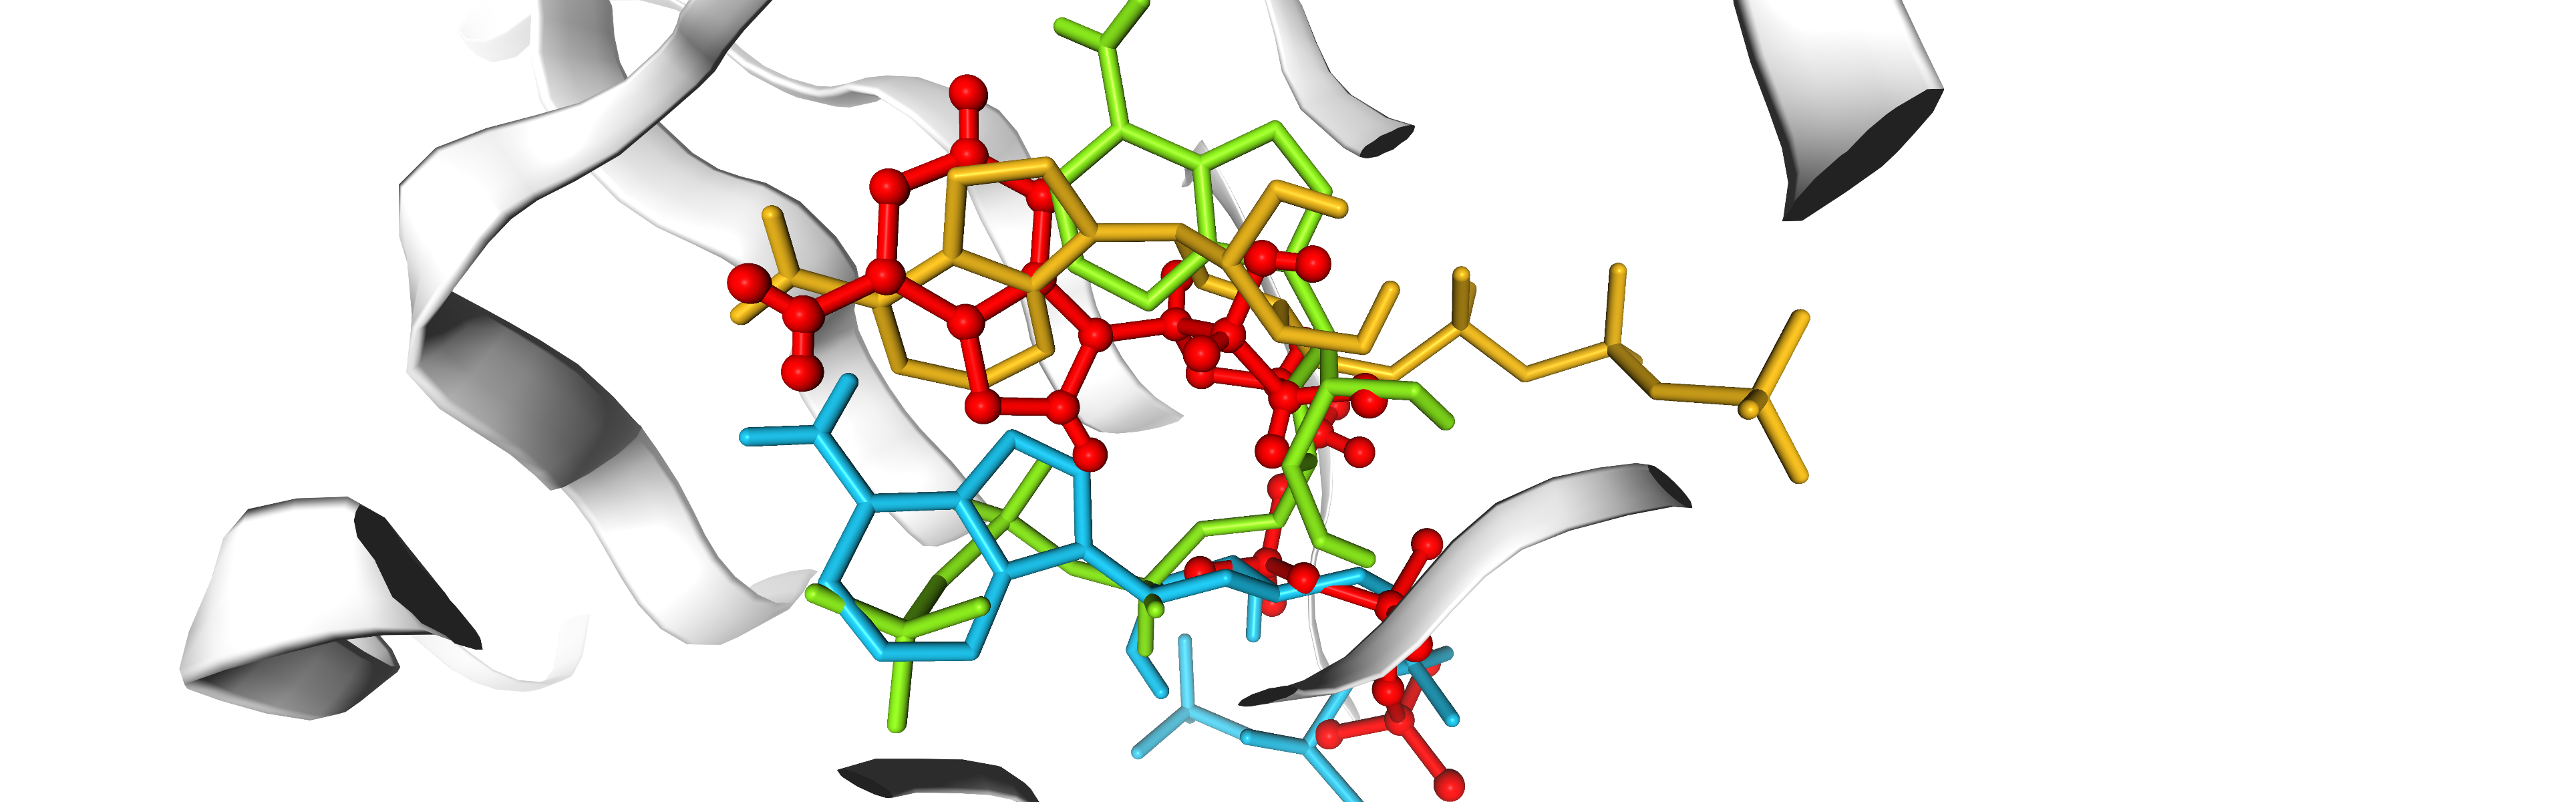

In [135]:
view._display_image()

### Valores de RMSD para la estructura

In [141]:
df_rmsd.loc[['1fin'], ['ad4_25M_LC', 'vina_128x', 'vinardo_128x']]

,ad4_25M_LC,vina_128x,vinardo_128x
1fin,4.9597,5.5856,4.9504


# Boxplots
### Distribución de los valores de RMSD

In [ ]:
import seaborn as sns
from matplotlib import cm
sns.set_context("talk")

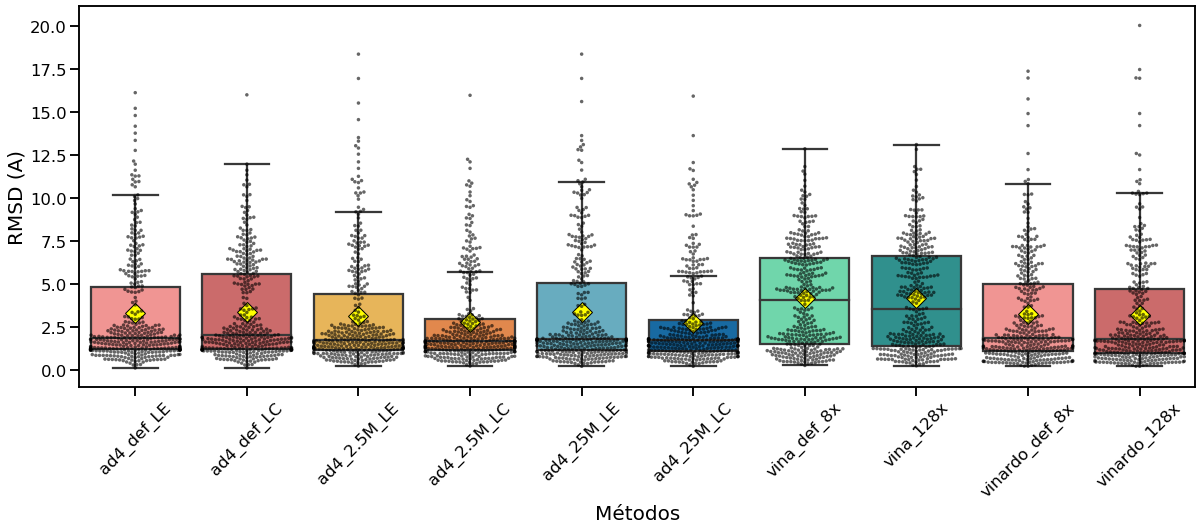

In [26]:
plt.rcParams['figure.figsize'] = [20, 7]
m_df_rmsd = df_rmsd.melt(var_name = 'groups', value_name = 'vals')

colores = [  "#FF8684", "#DB5B5B", "#FFBC42", "#FA8334", "#59B4CE", "#016FB9", "#5FE7AD", "#20A09C"]
ax = sns.boxplot(x="groups", y="vals", data=m_df_rmsd, fliersize = 0.0, palette = colores, showmeans=True, 
                meanprops={"marker":"D","markerfacecolor":"yellow", "markeredgecolor":"black", "markersize": 14})
ax = sns.swarmplot(x='groups', y='vals', data=m_df_rmsd, color="black",  size=3.5, alpha = 0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Métodos', fontsize=20);
ax.set_ylabel('RMSD (A)', fontsize=20);

Para dimplificar la visualización un poco, vamos a descartar AD4 a 25 millones

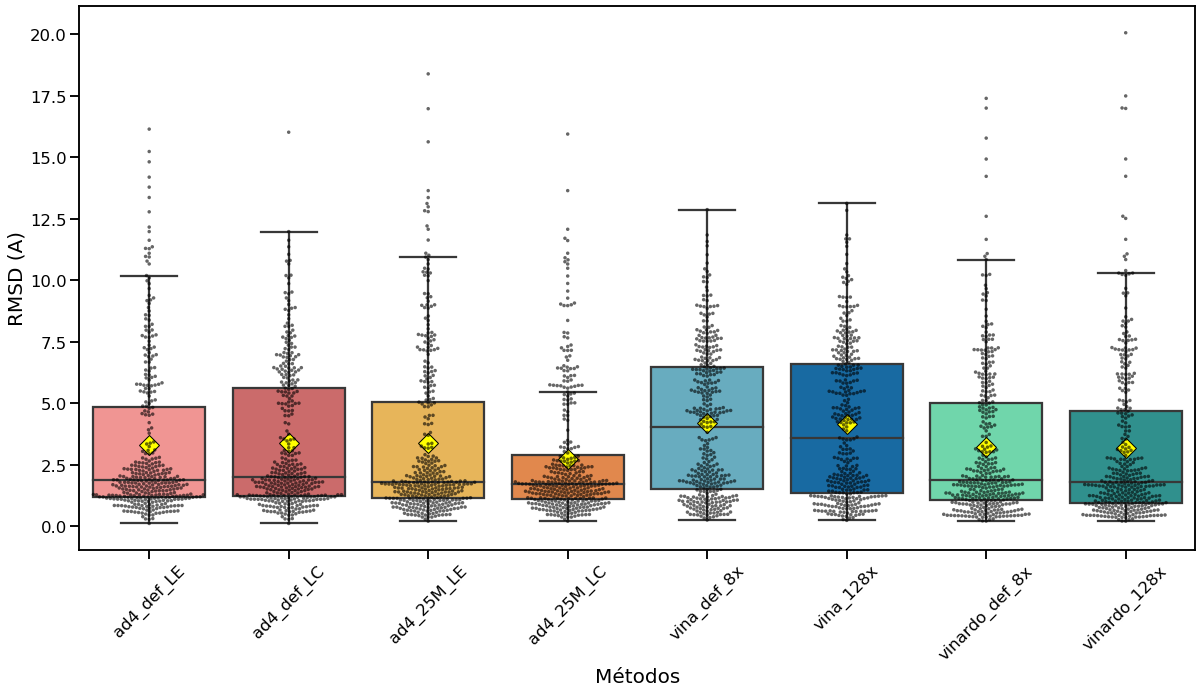

In [30]:
plt.rcParams['figure.figsize'] = [20, 10]
m_df_rmsd = df_rmsd.drop(["ad4_2.5M_LE", "ad4_2.5M_LC"], axis = 1).melt(var_name = 'groups', value_name = 'vals')

colores = [  "#FF8684", "#DB5B5B", "#FFBC42", "#FA8334", "#59B4CE", "#016FB9", "#5FE7AD", "#20A09C"]
ax = sns.boxplot(x="groups", y="vals", data=m_df_rmsd, fliersize = 0.0, palette = colores, showmeans=True, 
                meanprops={"marker":"D","markerfacecolor":"yellow", "markeredgecolor":"black", "markersize": 14})
ax = sns.swarmplot(x='groups', y='vals', data=m_df_rmsd, color="black",  size=3.5, alpha = 0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Métodos', fontsize=20);
ax.set_ylabel('RMSD (A)', fontsize=20);

## Density plots

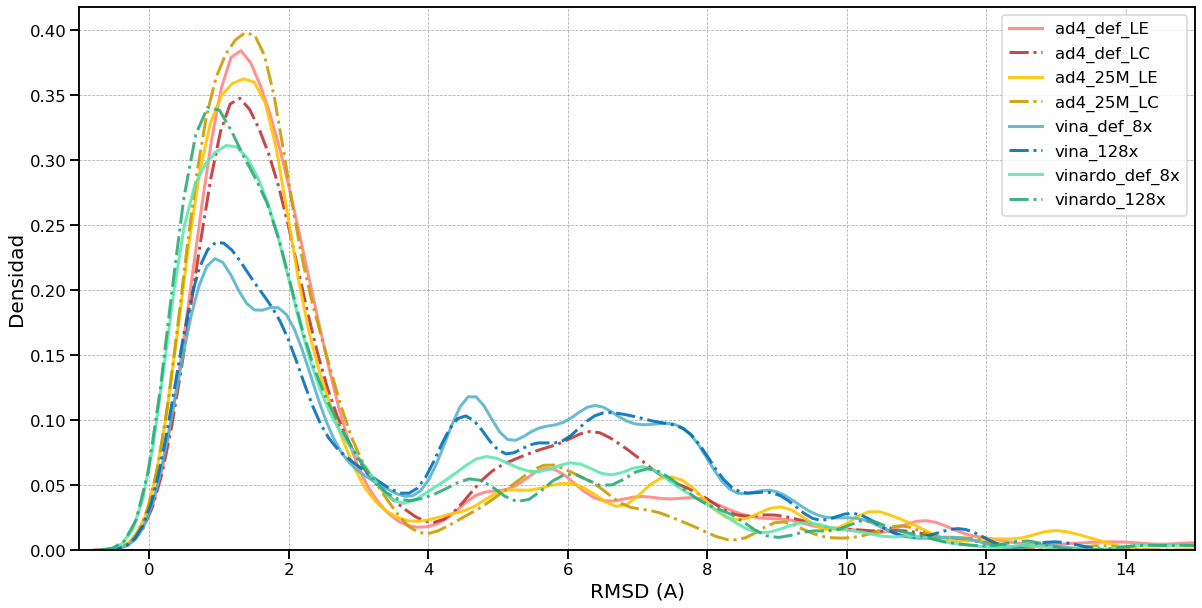

In [35]:
colores = [  "#FF8684", "#C03535", "#FFC500", "#CB9D00", "#59B4CE", "#016FB9", "#5FE7B1", "#2DAB78"]
estilos = ["-", "-.", "-", "-.", "-", "-.", "-", "-."]

df = df_rmsd.drop(["ad4_2.5M_LE", "ad4_2.5M_LC"], axis = 1)

fig, ax = plt.subplots()
for column, color, estilo in zip(df, colores, estilos):
    ax = sns.kdeplot(df[column], shade=False, alpha=0.9, 
                     color= color, linestyle= estilo, linewidth=3, bw=.3)
ax.set_xlabel('RMSD (A)', fontsize=20)
ax.set_ylabel('Densidad', fontsize=20)
ax.grid(linestyle='--', linewidth='0.8')
ax.set_xlim(-1,15);

In [36]:
# Evaluación del número de ligandos cuyo RMSD cae dentro de un cutoff de 2 A
for columna in df_rmsd:
    a = len(df_rmsd[columna][df_rmsd[columna] < 2])
    print(columna, a)

ad4_def_LE 198
ad4_def_LC 181
ad4_2.5M_LE 202
ad4_2.5M_LC 218
ad4_25M_LE 204
ad4_25M_LC 221
vina_def_8x 124
vina_128x 136
vinardo_def_8x 191
vinardo_128x 200


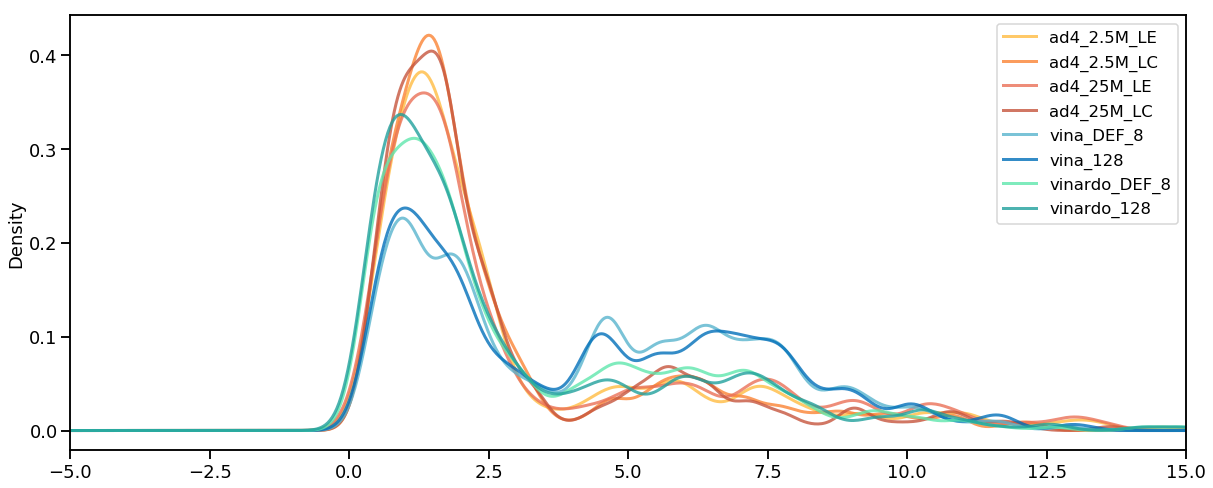

In [11]:
import matplotlib.pyplot as plt
#import seaborn as sns
colores = [ "#FFBC42", "#FA8334", "#EA7157", "#C6553D", "#59B4CE", "#016FB9", "#5FE7AD", "#20A09C"]

styles=['pink--', 'ro-', 'y^-']
sns.set_context("talk")
ax = df_rmsd[[
    #'ad4_def_LE', 
    #'ad4_def_LC',
    'ad4_2.5M_LE',
    'ad4_2.5M_LC',
    'ad4_25M_LE', 
    'ad4_25M_LC',
    #'ad4_250K-150r_LE',
    #'ad4_250K-150r_LC',
    'vina_DEF_8', 
    'vina_128',
    'vinardo_DEF_8', 
    'vinardo_128'
]].plot.kde(bw_method = 0.1,  linewidth = 3, alpha = 0.8, fontsize = 18,
            #title = "Valores de RMSD redocking CDK2", 
            color = colores, 
            #style = styles,
            xlim = (-5,15))



## Normalidad

In [12]:
import pylab
import scipy.stats as stats
import statsmodels.api as sm

for i, j in zip(df_rmsd, df_rmsd.T.values):
    norm_t = stats.shapiro(j)
    print(i, '\t', norm_t[1])

ad4_def_LE 	 3.574428726010314e-22
ad4_def_LC 	 1.5557159045536206e-18
ad4_25M_LE 	 4.927510466113768e-22
ad4_25M_LC 	 3.805611734914532e-23
ad4_2.5M_LE 	 4.4946479723783424e-23
ad4_2.5M_LC 	 6.986503061967923e-23
ad4_250K-150r_LE 	 2.9545636623574995e-23
ad4_250K-150r_LC 	 2.607067151946278e-22
vina_DEF_8 	 2.7466835229861264e-12
vina_128 	 4.110028832028656e-13
vinardo_DEF_8 	 4.3748180268297415e-20
vinardo_128 	 6.329845147042366e-22


## Transformar los datos
### Estandarizaci`on (z-score)

In [13]:
# Estandarizamos  cada columna de datos
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
rmsd_std = sScaler.fit_transform(df_rmsd)
# Equivalente a:
# pd.DataFrame( stats.zscore(df_rmsd), columns= df_rmsd.columns, index = df_rmsd.index )
# Lo convertimos en un dataframe
df_rmsd_std = pd.DataFrame(rmsd_std, columns= df_rmsd.columns, index = df_rmsd.index)
#df_rmsd_std.head()

### Log10

In [14]:
df_rmsd_log10 = pd.DataFrame( np.log10(df_rmsd), columns= df_rmsd.columns, index = df_rmsd.index )
#df_rmsd_log10.head()

## Normalidad en datos estandarizados/transformados

In [15]:
print('Prueba', '\t\t', 'p (std)', '\t\t', 'p (log10)')
for i, j, k in zip(df_rmsd, df_rmsd_std.T.values, df_rmsd_log10.T.values):
    norm_t_std = stats.shapiro(j); norm_t_log = stats.shapiro(k)
    print(i, '\t', norm_t_std[1], '\t\t', norm_t_log[1])

Prueba 		 p (std) 		 p (log10)
ad4_def_LE 	 3.5743954045256776e-22 		 1.2363204859866528e-07
ad4_def_LC 	 1.5557159045536206e-18 		 1.194002265947347e-07
ad4_25M_LE 	 4.927465027725627e-22 		 7.638952581601188e-08
ad4_25M_LC 	 3.8056839945734503e-23 		 2.129893573510344e-06
ad4_2.5M_LE 	 4.4946479723783424e-23 		 6.860823305032682e-07
ad4_2.5M_LC 	 6.986305531197256e-23 		 1.015046677821374e-06
ad4_250K-150r_LE 	 2.954647912702177e-23 		 2.0168126724229296e-08
ad4_250K-150r_LC 	 2.606994450525253e-22 		 1.1657450471602715e-07
vina_DEF_8 	 2.7468123262042177e-12 		 1.8101277421411766e-11
vina_128 	 4.110028832028656e-13 		 5.7636274225503215e-11
vinardo_DEF_8 	 4.374779575855955e-20 		 2.7285646865493618e-05
vinardo_128 	 6.32990320720499e-22 		 5.976162719889544e-05


## Homocedasticidad

In [16]:
rango = range(0,12)
print(*df_rmsd_std.iloc[:,rango])
stats.levene(*df_rmsd_std.iloc[:,rango].T.values,  center="median")

ad4_def_LE ad4_def_LC ad4_25M_LE ad4_25M_LC ad4_2.5M_LE ad4_2.5M_LC ad4_250K-150r_LE ad4_250K-150r_LC vina_DEF_8 vina_128 vinardo_DEF_8 vinardo_128


LeveneResult(statistic=4.354211836603327, pvalue=1.6252474817219472e-06)

# Kruskal-walis

In [17]:
rango = range(0,12)
print(*df_rmsd_log10.iloc[:,rango])
stats.kruskal(*df_rmsd_std.iloc[:,rango].T.values)

ad4_def_LE ad4_def_LC ad4_25M_LE ad4_25M_LC ad4_2.5M_LE ad4_2.5M_LC ad4_250K-150r_LE ad4_250K-150r_LC vina_DEF_8 vina_128 vinardo_DEF_8 vinardo_128


KruskalResult(statistic=13.413224488312922, pvalue=0.26717702033953505)

## Transformación de los datos

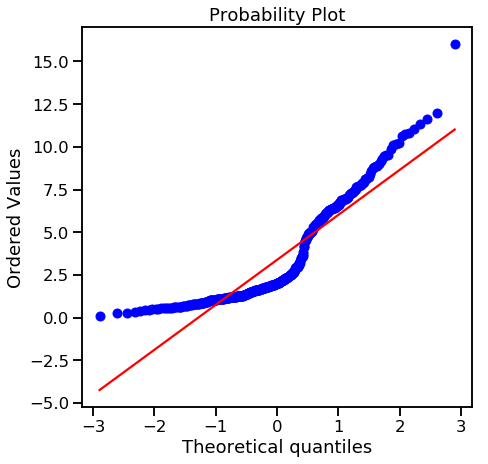

In [18]:
# Q-Q plot
import pylab
import scipy.stats as stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [7, 7]
stats.probplot(ad4_DEF_res[" rmsd_LC"], dist = "norm", plot=pylab)
pylab.show()

In [19]:
x = np.cbrt(ad4_25M_res[" rmsd_LE"])
y = np.cbrt(ad4_25M_res[" rmsd_LC"])
z = ad4_25M_res[" rmsd_LC"]
stats.levene(x, y,  center="median")

LeveneResult(statistic=7.796257964404778, pvalue=0.005373156401174709)

In [20]:
x = ad4_25M_res[" rmsd_LE"]
y = ad4_25M_res[" rmsd_LC"]
z = ad4_25M_res[" rmsd_LC"]
stats.wilcoxon(x, y)

WilcoxonResult(statistic=2632.0, pvalue=0.0002442642929482107)

In [21]:
import pylab
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()

x = sScaler.fit_transform( np.array(ad4_DEF_res[[" rmsd_LC"]]))[:,0]
w = sScaler.fit_transform( np.array(ad4_DEF_res[[" rmsd_LE"]]))[:,0]
y = sScaler.fit_transform( np.array(ad4_25M_res[[" rmsd_LC"]]))[:,0]
z = sScaler.fit_transform( np.array(ad4_25M_res[[" rmsd_LE"]]))[:,0]
stats.levene(x, y, z, w, center="median")

#plt.hist((rmsd_res), bins= bins)

LeveneResult(statistic=1.4629643496872133, pvalue=0.22289393232622662)

(0.7771522402763367, 6.32990320720499e-22)


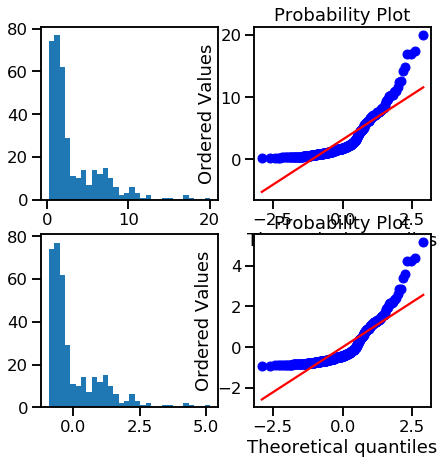

In [22]:
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()

rmsd_res = vinardo_128EX_res[" RMSD"]
trans = sScaler.fit_transform( np.array(vinardo_128EX_res[[" RMSD"]]))
n_t = stats.shapiro(trans)
bins = 30
print(n_t)

plt.subplot(2, 2, 1)
plt.hist(rmsd_res, bins= bins)
plt.subplot(2, 2, 2)
stats.probplot(rmsd_res, dist = "norm", plot=pylab)

plt.subplot(2, 2, 3)
plt.hist(trans[:,0], bins= bins)
plt.subplot(2, 2, 4)
stats.probplot(trans[:,0], dist = "norm", plot=pylab)

pylab.show()

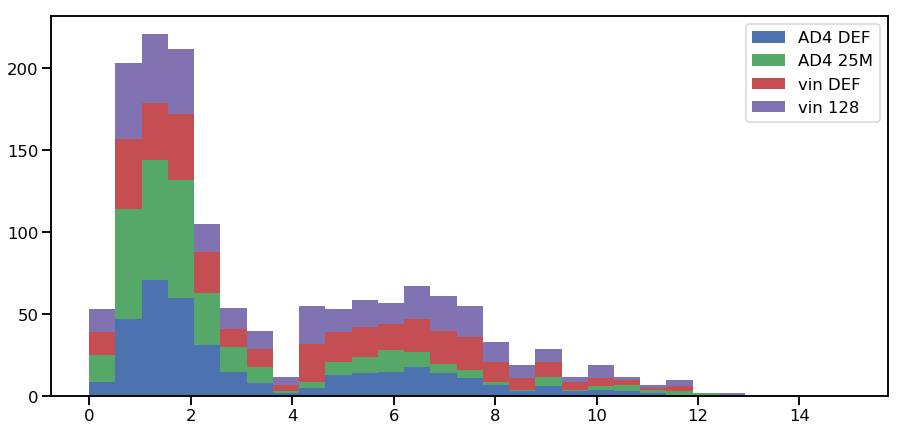

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
plt.style.use('seaborn-deep')

bins = np.linspace(0, 15, 30)
rmsd_list_res = [ad4_DEF_res[" rmsd_LC"], ad4_25M_res[" rmsd_LC"], vin_DEF_res[" RMSD"], vin_128EX_res[" RMSD"]]
labels = ['AD4 DEF', 'AD4 25M', "vin DEF", "vin 128"]
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', "#fff"]

plt.hist(rmsd_list_res, bins, label = labels,  stacked=True)
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Density')

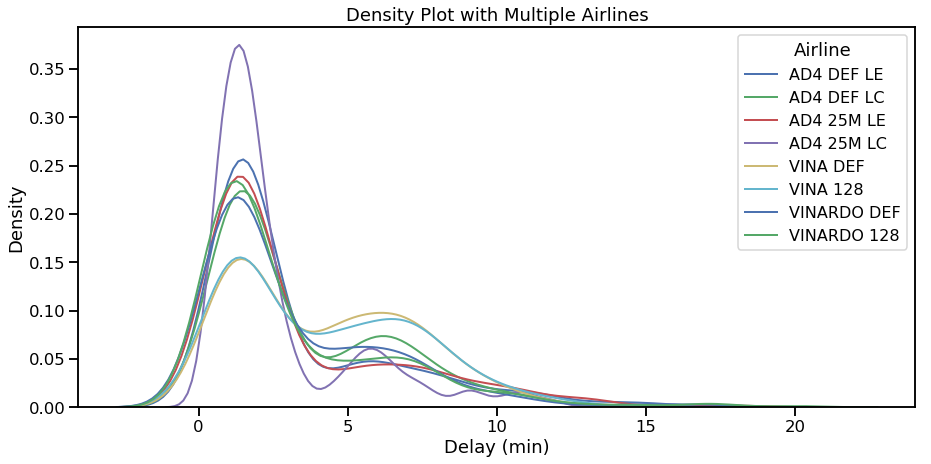

In [24]:

plt.rcParams['figure.figsize'] = [15, 7]
bins = np.linspace(0, 15, 30)
rmsd_list_res = [
                 ad4_DEF_res[" rmsd_LE"], ad4_DEF_res[" rmsd_LC"],
                 ad4_25M_res[" rmsd_LE"], ad4_25M_res[" rmsd_LC"],
                 #ad4_25K_100runs_res[" rmsd_LE"], ad4_25K_100runs_res[" rmsd_LC"],
                 vin_DEF_res[" RMSD"], vin_128EX_res[" RMSD"], 
                 vinardo_DEF_res[" RMSD"], vinardo_128EX_res[" RMSD"]
                    ]
labels = [
          'AD4 DEF LE', 'AD4 DEF LC', 
          'AD4 25M LE', 'AD4 25M LC',
          #'AD4 25K100 LE', 'AD4 25K100 LC',
          "VINA DEF", "VINA 128",
          "VINARDO DEF", "VINARDO 128"
        ]
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', "#fff"]

for result, label in zip(rmsd_list_res, labels):
    sns.distplot(result, hist = False, kde = True, kde_kws= {"linewidth": 2}, label = label)

plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')